In [1]:
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner

In [2]:
cust_json = "customer_classes.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"

arms = settings.prices
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm.values())

loading: [==============================] 99.6%
 [0, 2, 0, 0, 0] 1434.7214848 14.347214848 dict_values([1140.9720832, 1022.1191833600001, 964.8015155200002, 865.3082060800001, 1118.2964736, 1007.11792128, 953.4826649600001, 860.76701184, 1122.3378688, 1014.6013542400002, 962.6097356800003, 873.08534272, 1105.873664, 1002.1060352, 952.0214784, 865.9517696, 1080.7623680000002, 967.4050304000001, 912.7327488000001, 817.9327232, 1060.228864, 953.7678592000001, 902.4103424000001, 813.5931136, 1063.0901120000003, 959.7950336, 909.9537792000001, 823.9868288, 1048.4473600000001, 948.694528, 900.5576960000001, 817.6291840000001, 1043.0550976000002, 933.38854528, 880.4848601600002, 788.9893542400001, 1023.9317248000001, 920.6005734400002, 870.74720768, 784.64964352, 1025.8096384, 925.44861952, 877.0216294400001, 793.5242521600001, 1012.4347520000001, 915.3072896, 868.4383872000002, 787.6729088, 950.0048512000003, 847.22995456, 797.6953011200002, 711.1047500800001, 933.7509376, 836.5827788800001,

In [8]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 100
NUM_ITERATION = 5

In [9]:
aggregate_customer = Customer(
    0,
    0,
    environment.get_aggregate_alphas(),
    environment.get_aggregate_num_prods_distribution(),
    environment.get_aggregate_click_graph()
    )


UCB

In [10]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb1_learner = UCBLearner(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb1_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb1_learner.update(super_arm.copy(), report)
    rewards = ucb1_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%[3, 3, 3, 3, 3]
[2, 2, 2, 3, 2]
[3, 3, 2, 2, 1]
[1, 2, 1, 2, 1]
[1, 1, 2, 3, 2]
[3, 2, 1, 3, 1]
[2, 2, 3, 2, 0]
[0, 3, 1, 2, 0]
[0, 2, 0, 3, 0]
[3, 2, 0, 3, 0]
loading: [===                           ] 10.0%[2, 1, 0, 2, 3]
[0, 3, 0, 2, 2]
[0, 2, 2, 1, 0]
[3, 1, 1, 1, 1]
[0, 2, 0, 3, 0]
[0, 1, 3, 1, 0]
[0, 2, 0, 2, 1]
[1, 2, 1, 1, 0]
[3, 1, 0, 3, 0]
[0, 3, 0, 2, 0]
loading: [======                        ] 20.0%[0, 2, 1, 1, 2]
[2, 1, 1, 2, 0]
[0, 2, 0, 2, 1]
[1, 1, 2, 3, 0]
[0, 2, 0, 3, 3]
[3, 0, 0, 2, 0]
[0, 3, 0, 1, 3]
[0, 2, 0, 2, 0]
[0, 2, 1, 1, 2]
[0, 0, 2, 3, 0]
loading: [=========                     ] 30.0%[0, 3, 0, 1, 0]
[0, 2, 0, 2, 1]
[3, 0, 0, 2, 0]
[2, 1, 0, 2, 0]
[0, 1, 1, 2, 0]
[0, 2, 0, 0, 1]
[1, 1, 0, 1, 0]
[0, 2, 0, 0, 1]
[0, 1, 3, 0, 0]
[0, 3, 0, 0, 0]
loading: [============                  ] 40.0%[0, 2, 0, 0, 0]
[0, 2, 0, 0, 1]
[3, 0, 0, 0, 0]
[0, 2, 0, 0, 2]
[0, 2, 0, 0, 1]
[3, 1, 0, 0, 0]
[0, 2, 0, 0, 1]


(5, 100)

In [13]:
ucb1_learner.estimate_conversion_rates()

array([[0.84262198, 0.66920826, 0.48428768, 0.31359499],
       [0.83595269, 0.60646292, 0.36679921, 0.28962874],
       [0.79400133, 0.67544291, 0.55983411, 0.45056009],
       [0.89955076, 0.76533971, 0.67119442, 0.59644418],
       [0.70465193, 0.61835027, 0.53043827, 0.47392845]])

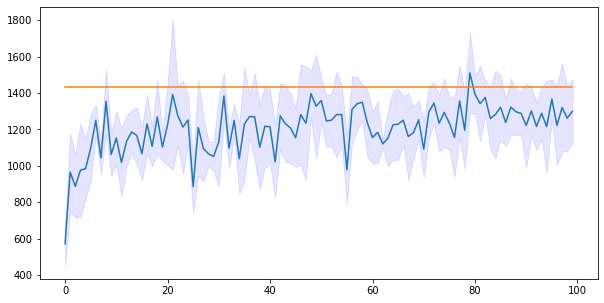

In [14]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

TS

In [15]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner = TSLearner(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts_learner.select_superarm()
        report = environment.round(super_arm)
        ts_learner.update(super_arm.copy(), report)
    rewards = ts_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape


Iteration # 1
loading: [===========================   ] 90.0%
Iteration # 2
loading: [===========================   ] 90.0%
Iteration # 3
loading: [===========================   ] 90.0%
Iteration # 4
loading: [===========================   ] 90.0%
Iteration # 5
loading: [===========================   ] 90.0%

(5, 100)

In [16]:
ts_learner.estimate_conversion_rates()

array([[0.75798116, 0.46487107, 0.2818592 , 0.0355678 ],
       [0.51500393, 0.48541162, 0.30709093, 0.09096748],
       [0.72498993, 0.52872163, 0.30228562, 0.16834616],
       [0.74495693, 0.58808254, 0.37217839, 0.3317726 ],
       [0.62810735, 0.42340755, 0.22335271, 0.29049065]])

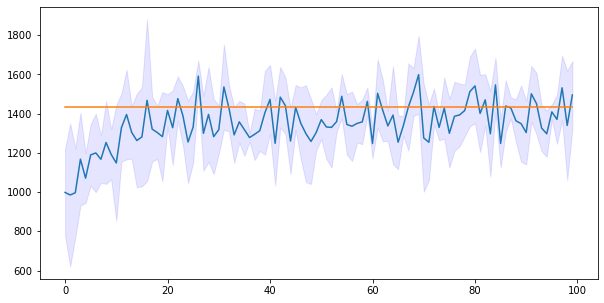

In [18]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

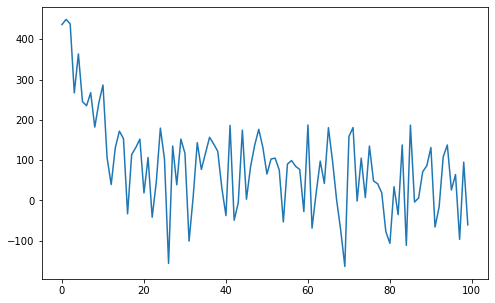

In [28]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()